In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam, Adamax
from keras.callbacks import ReduceLROnPlateau

In [36]:
data = pd.read_csv('C:/Users/Hp/Jupyter/archive/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [37]:
X = data.drop(columns=['label']).values # features
y = data['label'].values   # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 49)

classes = ['Melanocytic nevi', 'Melanoma', 'Basal cell carcinoma', 'Actinic keratoses', 
           'Benign keratosis-like lesions', 'Dermatofibroma', 'Vascular lesions']
num_classes = len(classes)

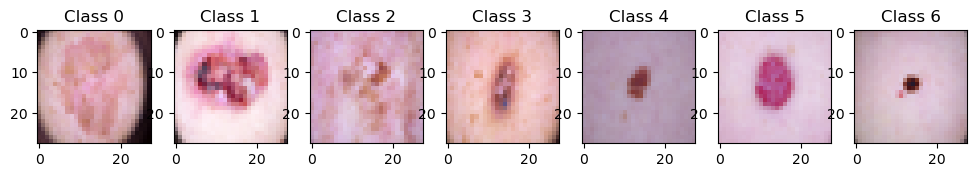

In [38]:
unique_classes = np.unique(y)
plt.figure(figsize=(12, 6))

for i, class_label in enumerate(unique_classes):
    plt.subplot(1, len(unique_classes), i + 1)
    sample_indices = np.where(y == class_label)[0]  # Get indices of all samples in the class
    sample_index = sample_indices[0]  # Get the index of the first sample in the class
    sample_image = X[sample_index].reshape(28, 28, 3)  # Reshape the sample to (28, 28, 3)

    plt.imshow(sample_image)
    plt.title(f'Class {class_label}')
   
plt.show()

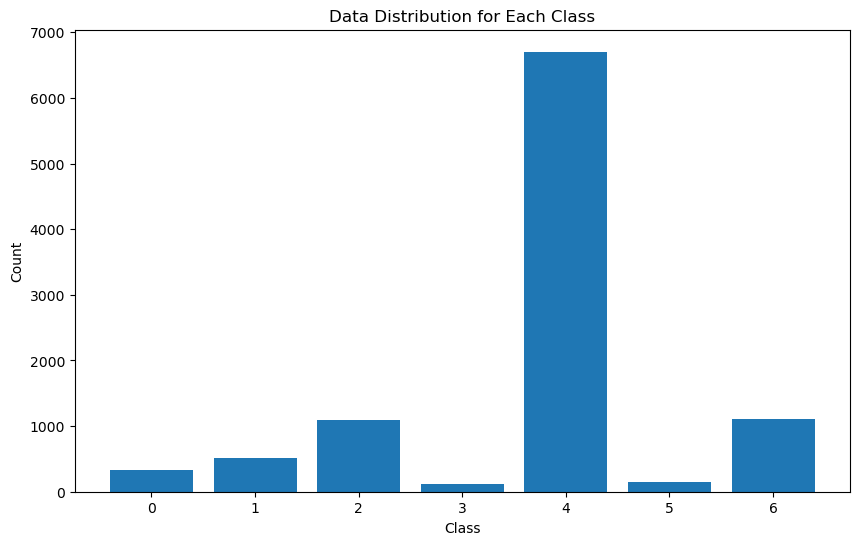

In [39]:
class_distribution = pd.Series(y).value_counts().sort_index()
class_labels = class_distribution.index
class_counts = class_distribution.values

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution for Each Class')
plt.xticks(class_labels)
plt.show()

In [40]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
model = keras.models.Sequential()

# Create Model Structure
# input layer 
model.add(keras.layers.Input(shape=[28, 28, 3]))

# 1st layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# 2nd layer
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# 3rd layer
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# 4th layer
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# flattening output from convolutional layers for the fully connected layers
model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(rate=0.2))

# 1st Fully Connected Layer
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

# 2nd Fully Connected Layer
model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

# 3rd Fully Connected Layer
model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

# 4th Fully Connected Layer
model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

# Output Layer with 7 units (bcs 7 classes needed for classification)
model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

Epoch 1/5
188/188 [==============================] - 57s 301ms/step - loss: 1.5669 - accuracy: 0.5305 - val_loss: 1.1465 - val_accuracy: 0.6447
Epoch 2/5
188/188 [==============================] - 57s 304ms/step - loss: 1.0749 - accuracy: 0.6786 - val_loss: 0.9655 - val_accuracy: 0.7026
Epoch 3/5
188/188 [==============================] - 58s 307ms/step - loss: 0.9095 - accuracy: 0.7190 - val_loss: 0.9148 - val_accuracy: 0.7139
Epoch 4/5
188/188 [==============================] - 56s 297ms/step - loss: 0.8361 - accuracy: 0.7249 - val_loss: 0.8251 - val_accuracy: 0.7272
Epoch 5/5
188/188 [==============================] - 57s 301ms/step - loss: 0.7784 - accuracy: 0.7417 - val_loss: 0.8391 - val_accuracy: 0.7279


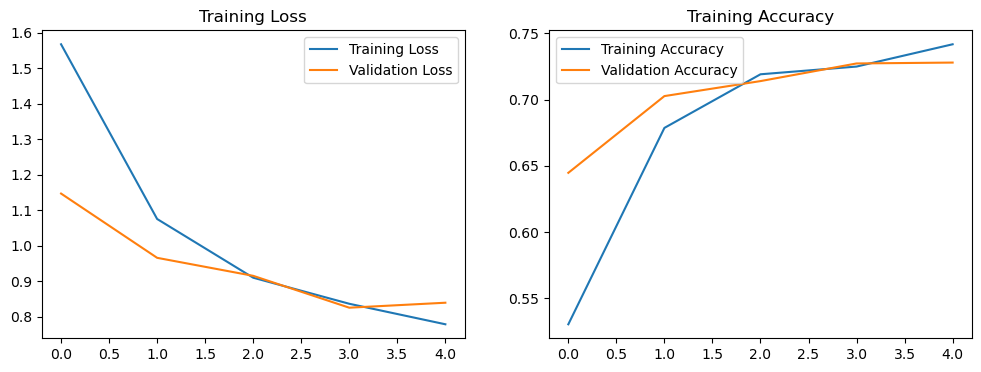

In [43]:
X_train = X_train.reshape(-1, 28, 28, 3)
X_test = X_test.reshape(-1, 28, 28, 3)

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

In [44]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1) 
y_pred_classes = np.argmax(y_pred, axis=1)

79/79 [==============================] - 4s 56ms/step


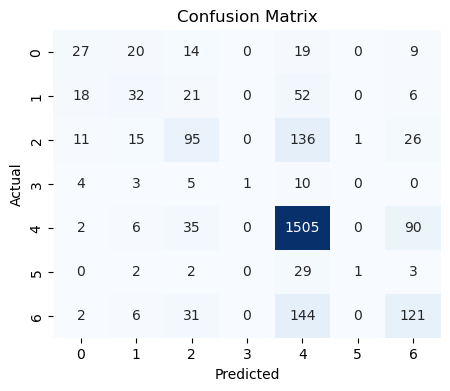

In [45]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

accuracy = accuracy_score(y_true, y_pred_classes)

print("Accuracy:", accuracy*100)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 71.1661341853035
Precision: 0.6814053263004695
Recall: 0.7116613418530351
F1-Score: 0.6836724884801639
